**Link for the Dataset**

https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import models,layers

In [22]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "C:\\Users\\Laptops Garage W11\\Downloads\\archive\\PlantVillage",
        shuffle=True,
        image_size = (IMAGE_SIZE,IMAGE_SIZE),
        batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


We have loaded 2152 files from the PlantVillage folder containing
images of healthy and diseased images of Plants.

In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

Here we get that there are 68 datasets because we have 
divided them into the batches of 32 each.

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 2 0 2 1 0 0 1 1 0 0]


This code snippet takes the first batch of images and labels from a dataset. 
It prints the shape of the image batch and the numeric values of the label batch.

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

**We divide the dataset into 3 parts:-
80% - Training
20% - Testing and Validation.**

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

This function partitions a TensorFlow dataset into training, validation, and test sets based on specified splits.
It shuffles the dataset if required and calculates the sizes for each partition.
The training set is taken from the beginning, the validation set is taken from the middle, and the test set comprises the remaining portion.
The resulting datasets are returned. The function ensures that the sum of the split ratios is equal to 1 and allows customization of shuffle behavior and shuffle size for randomness.
It's a versatile utility for preparing datasets for machine learning model training and evaluation.

This assertion is checking whether the sum of train_split, test_split, and val_split is equal to 1.
This is a safeguard to ensure that the specified dataset splits represent a valid partitioning, 
where the entire dataset is covered (100%) by the combination of training, validation, and test sets.
If the sum is not equal to 1, the program will raise an AssertionError, 
indicating that the dataset splits are not correctly defined.

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(test_ds)

8

In [17]:
len(val_ds)

6

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

This code sets up a TensorFlow dataset pipeline for training. It caches the dataset in memory,
shuffles it with a buffer size of 1000, and prefetches elements to improve training performance
by overlapping data loading and model execution.

**Cache**: train_ds.cache() caches the dataset in memory after the first iteration. 
This accelerates data retrieval as subsequent epochs can directly access the cached data without reloading it.

**Prefetch**: train_ds.prefetch() prefetches batches of data, allowing the GPU to work on the current batch while simultaneously loading the next one. This helps to minimize the idle time of the GPU, optimizing overall training speed by overlapping data loading and model execution.

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

We rotate the images and make more samples in the data augementation process.

We are going to use **Convolutional Neural Network:-**
There are 2 layers in this architecture-
1) Convolutional
2) Pooling

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

We pass the the neural network layers in this code- , we built the 
Sequential model **passing resize_and _rescale , data_augmentation as a layer**
Then we pass some Convolutional and Pooling Layers.
The number of layers we have obtained are from trial and error method.
Then we flatten the layer - layer.Flatten()
After this we build the model.

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
#We compile the model now-

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=15,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/15


54/54 [==============================] - 160s 3s/step - loss: 0.9191 - accuracy: 0.4606 - val_loss: 0.8234 - val_accuracy: 0.5000
Epoch 2/15
54/54 [==============================] - 127s 2s/step - loss: 0.8132 - accuracy: 0.5955 - val_loss: 0.5591 - val_accuracy: 0.7812
Epoch 3/15
54/54 [==============================] - 127s 2s/step - loss: 0.6010 - accuracy: 0.7413 - val_loss: 0.4163 - val_accuracy: 0.8281
Epoch 4/15
54/54 [==============================] - 124s 2s/step - loss: 0.4343 - accuracy: 0.8206 - val_loss: 0.4641 - val_accuracy: 0.7396
Epoch 5/15
54/54 [==============================] - 123s 2s/step - loss: 0.4282 - accuracy: 0.8223 - val_loss: 0.2412 - val_accuracy: 0.8854
Epoch 6/15
54/54 [==============================] - 124s 2s/step - loss: 0.2462 - accuracy: 0.9051 - val_loss: 0.2912 - val_accuracy: 0.8802
Epoch 7/15
54/54 [==============================] - 133s 2s/step - loss: 0.3802 - accuracy: 0.8438 - val_loss: 0.2899 - val_accuracy: 0.8698
Epoch 8/15


**Verbose** is a parameter used in the fit method of a Keras model.
The verbose parameter controls the amount of information you want to see during the training process.
**verbose=0: Silent mode.** No output will be displayed during training.
**verbose=1: Progress bar.** It displays an animated progress bar that includes 

In [28]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 8s 488ms/step - loss: 0.1842 - accuracy: 0.9297


[0.18423518538475037, 0.9296875]

This returns a python list which gives us the **Loss** and **Accuracy**.

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

Returns the value of variables such as epochs,steps and verbose
Check the documentation of **Tensorflow callbacks.**

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss, accuracy, val loss etc are a python list containing values of loss,
accuracy etc at the end of each epoch.
History is a variable that keeps track of the various valeues after 
each training or epoch.

In [33]:
type(history.history['loss'])

list

It is usually a list that stores the value of accuracy and loss.
If we do it for 15 epochs it stores 15 values of accuarcy and loss.

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#We check the accuracy and loss on the validation dataset.

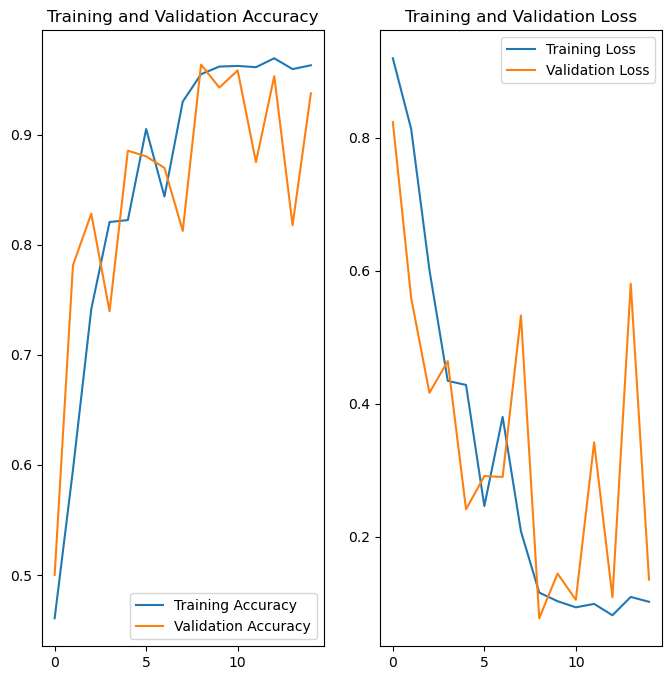

In [36]:
#Let us plot a graph for Training and Validation accuracy.
#Another graph for plotting the loss.

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


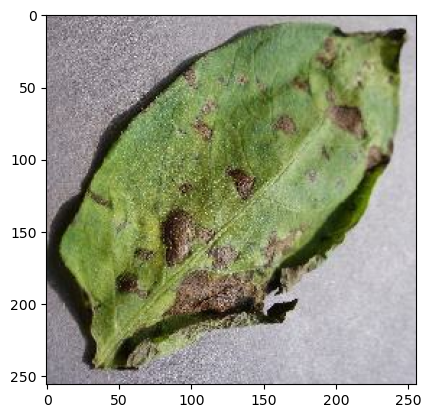

In [37]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

for images_batch, labels_batch in test_ds.take(1)::

It looks like test_ds is an iterable dataset (possibly a TensorFlow Dataset) containing test data, and this line is using take(1) to extract one batch of test images and their corresponding labels.
first_image = images_batch[0].numpy().astype('uint8'):

Extracts the first image from the batch, converts it to a NumPy array using .numpy(), and then casts it to the 'uint8' data type. This is likely done to convert pixel values from a floating-point representation to an unsigned 8-bit integer.
first_label = labels_batch[0].numpy():

Extracts the label corresponding to the first image in the batch using the same approach.
print("first image to predict"):

Prints a message indicating that the following output will be related to the first image in the batch.
plt.imshow(first_image):

Uses Matplotlib's imshow function to display the first image.
print("actual label:", class_names[first_label]):

Prints the actual label of the first image using the class_names list or array.
batch_prediction = model.predict(images_batch):

Uses the trained model (model) to predict labels for the entire batch of images (images_batch) and stores the predictions in batch_prediction.
print("predicted label:", class_names[np.argmax(batch_prediction[0])]):

Prints the predicted label for the first image in the batch. It uses np.argmax to find the index of the maximum predicted probability in the prediction array, and then uses this index to get the corresponding class name from the class_names list.
Overall, this code is part of a process to visually inspect the predictions made by a machine learning model on a batch of test images and compare them with the actual labels. The class_names array likely contains the human-readable names corresponding to the numeric class labels predicted by the model.

In [38]:
#This function takes in a model and image as input and tells the predicted class and confidence

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


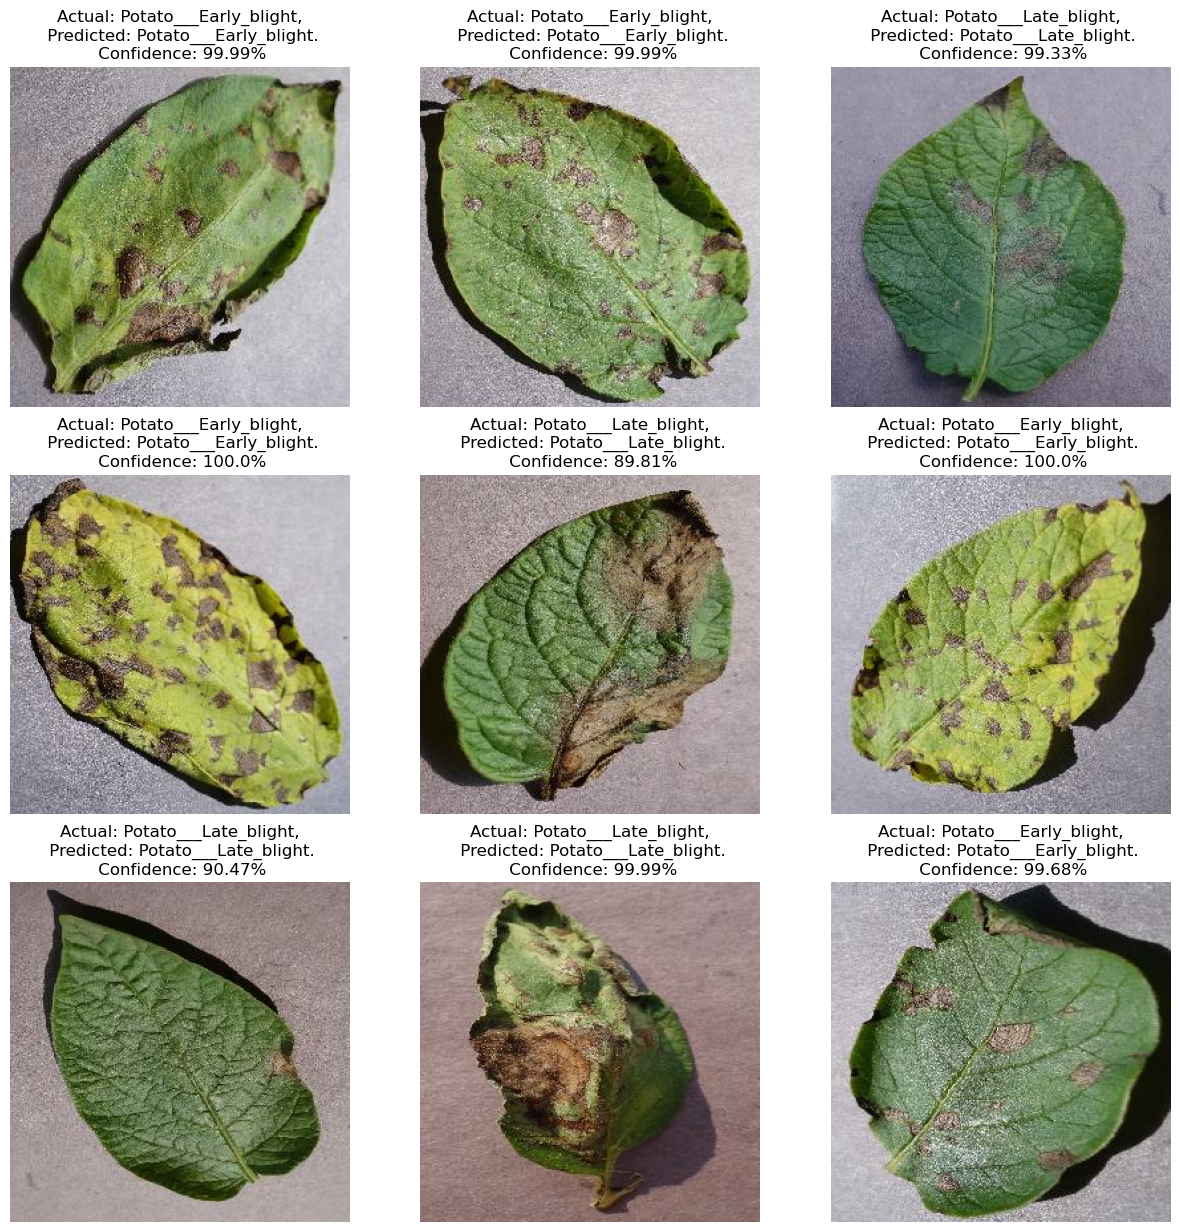

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

Explanation for the above code:-
subplot:-  means we will plot many images under the code block.
plt.imshow():- This is likely done to convert pixel values from a floating-point representation
to an unsigned 8-bit integer.

In [40]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


The above code saves the model in the models directory which I have
created in the **Potato Disease** folder.